<h1 align="center">PART I</h1>
<h1 align="center">Data Processing and Preparation for Training</h1>

The aim was to process the semantic analysis of Ukrainian texts, so the collection of positive and negative reviews was translated into Ukrainian using Google Translate.

To get started, we import some libraries we need:

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET

%matplotlib inline

Also let's write a style for alignment in the middle of all graphs, images, etc:

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Since we only need files with positive and negative reviews, let's delete the others. And for our negative and positive reviews, we will add a parent tag in which all the reviews will be, so it will be easier to make xml tree. Also, our xml library will complain about the character `&` when parsing, so we will replace it with the word `та`:

In [3]:
# import os

# for parent, dirnames, filenames in os.walk('sorted_data'):
#     for fn in filenames:
#         filepath = os.path.join(parent, fn)
#         if not (fn.startswith('positive') or fn.startswith('negative')):
#             os.remove(filepath)
#         else:
#             with open(filepath, 'r') as original: data = original.read().replace("&", "and").replace("", "")
#             with open(filepath, 'w') as modified: modified.writelines(["<reviews>\n"] + data.splitlines(True)[1:-1] + ["</reviews>"])
#             # if you do it for the first time - uncomment line below 
#             # with open(filepath, 'w') as modified: modified.writelines(["<reviews>\n"] + data.splitlines(True) + ["</reviews>"])    

# print("Remove unnecessary files!\nAdd additional tag to reviews!")

Next, since our reviews are in XML format, we need to process each line to get the value from the tags.

**Note**: 
* **`errors='ignore'`** used to skip all possible incorrect characters in our documents;

* **`readLines`** return all lines in the file, as a list where each line is an item in the list object.

In [4]:
# test_read = open('data/positive.review', 'r', encoding='utf8', errors='ignore').readlines()
# for i in range(85):
#     print(test_read[i])

In our directory with training sets we have two files - with positive and negative reviews, each of these files contains 1000 unprocessed reviews. Let's check this:

In [5]:
# pos_reviews = open('sorted_data/positive.review', 'r', encoding='utf8', errors='ignore').read()
# neg_reviews = open('sorted_data/negative.review', 'r', encoding='utf8', errors='ignore').read()

# pos_rev_tree = ET.fromstring(pos_reviews)
# neg_rev_tree = ET.fromstring(neg_reviews)

# pos_tags = pos_rev_tree.findall('review')
# neg_tags = neg_rev_tree.findall('review')

# print('\nNumber of Positive Reviews:', len(pos_tags),
#       '\nNumber of Negative Reviews:', len(neg_tags))

**Note:** 
* **`fromstring()`** parses XML from a string directly into an Element, which is the root element of the parsed tree;
* **`findall() `** finds all elements with a tag which are direct children of the current element (`reviews`).

<h2 align="center">XML Parse</h2>

Now we will try to parse our XML file at a basic level. We will create a dictionary from the lists. Each list will contain certain tags and their content for single review. We already have a tree with positive and negative reviews, so all that remains is to parse it. But before that, let's list all the tags in our xml files so we don't have to repeat:

In [6]:
# REVIEW_TAGS = ['unique_id', 'asin', 'product_name', 'helpful', 'rating', 'title',
#                'date', 'reviewer', 'reviewer_location', 'review_text']

In [7]:
# def parseXML(xml_reviews):
#     reviews = {}
#     count = 0

#     for item in xml_reviews:
#         count += 1
#         rev_name = 'review' + str(count)
#         reviews[rev_name] = [
#             REVIEW_TAGS[0] + ' | ' + item.find(REVIEW_TAGS[0]).text.strip(),
#             REVIEW_TAGS[1] + ' | ' + item.find(REVIEW_TAGS[1]).text.strip(),
#             REVIEW_TAGS[2] + ' | ' + item.find(REVIEW_TAGS[2]).text.strip(),
#             REVIEW_TAGS[3] + ' | ' + item.find(REVIEW_TAGS[3]).text.strip(),
#             REVIEW_TAGS[4] + ' | ' + item.find(REVIEW_TAGS[4]).text.strip(),
#             REVIEW_TAGS[5] + ' | ' + item.find(REVIEW_TAGS[5]).text.strip(),
#             REVIEW_TAGS[6] + ' | ' + item.find(REVIEW_TAGS[6]).text.strip(),
#             REVIEW_TAGS[7] + ' | ' + item.find(REVIEW_TAGS[7]).text.strip(),
#             REVIEW_TAGS[8] + ' | ' + item.find(REVIEW_TAGS[8]).text.strip(),
#             REVIEW_TAGS[9] + ' | ' + item.find(REVIEW_TAGS[9]).text.strip()
#         ]

#     return reviews

Now let's actually create dictionaries with the required values and check output:

In [8]:
# pos_reviews_dict = parseXML(pos_tags)
# neg_reviews_dict = parseXML(neg_tags)
# pos_reviews_dict['review1']

Next, we will turn our reviews dictionaries into a Pandas DataFrame:

In [9]:
# def dict_to_dataframe(reviews_dict):
#     # prepare our dataframe for the data
#     df = pd.DataFrame(columns=REVIEW_TAGS)
#     count = 0
#     for val in reviews_dict.values():
#         df.loc[count] = [
#             val[0].split("|")[1], val[1].split("|")[1],
#             val[2].split("|")[1], val[3].split("|")[1],
#             val[4].split("|")[1], val[5].split("|")[1],
#             val[6].split("|")[1], val[7].split("|")[1],
#             val[8].split("|")[1], val[9].split("|")[1]
#         ]

#         count = count + 1

#     return df

# pos_books = dict_to_dataframe(pos_reviews_dict)
# neg_books = dict_to_dataframe(neg_reviews_dict)

Let's check for correctness:

In [10]:
# pos_books.head(n=3)

In [11]:
# neg_books.head(n=3)

Everything is correct, wonderful! And now we will do what we did above, but for a reviews of all categories of Amazon datasets:

In [12]:
# pos_reviews, neg_reviews = [], []
# counter = 0 # for styled output 

# for parent, dirnames, filenames in os.walk('sorted_data'):
#     for fn in filenames:
#         filepath = os.path.join(parent, fn)
#         if counter % 2 == 0: print("—" * 60)
        
#         if fn == "positive.review":
#             pos_rev_tree = ET.fromstring(open(filepath, 'r').read())
#             pos_tags = pos_rev_tree.findall('review')
#             pos_reviews.append(parseXML(pos_tags))
#             counter += 1
#             print("| Parse", filepath.center(50), "|")
        
#         if fn == "negative.review":
#             neg_rev_tree = ET.fromstring(open(filepath, 'r').read())
#             neg_tags = neg_rev_tree.findall('review')
#             neg_reviews.append(parseXML(neg_tags))
#             counter += 1
#             print("| Parse", filepath.center(50), "|")

# print("—" * 60, "\n\n!!! Reviews parsing completed successfully !!!")

We now have parsed positive and negative reviews for 25 different categories, so let's check this:

In [13]:
# print("Number of Positive Categories:", len(pos_reviews), 
#     "\nNumber of Negative Categories:", len(neg_reviews))

# print("\nNumber of Positive Reviews (Automotive Category):", len(pos_reviews[1]), 
#       "\nNumber of Negative Reviews (Books Category):", len(neg_reviews[4]))

In [14]:
# positive_df, negative_df = pd.DataFrame(columns=REVIEW_TAGS), pd.DataFrame(columns=REVIEW_TAGS)

In [15]:
# for review in pos_reviews:
#     print(review['review1'], '\n')
#     df = dict_to_dataframe(review)
#     positive_df = pd.concat([positive_df, df])
#     df.empty

In [16]:
# for review in neg_reviews:
#     df = dict_to_dataframe(review)
#     negative_df = pd.concat([negative_df, df])
#     df.empty

Let's generate descriptive statistics. Pandas Dataframe descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. We will also check whether the number of positive and negative reviews has been preserved.

In [17]:
# print('\nNumber of Positive Reviews (Dataframe):', len(pos_books),
#       '\nNumber of Negative Reviews (Dataframe):', len(neg_books))

# pos_books.describe()
# neg_books.describe()

Actually, `unique_id` has the same information as tags `asin`, `title` and `reviewer` so we can remove it:

In [18]:
# pos_books.drop('unique_id', axis=1, inplace=True)
# neg_books.drop('unique_id', axis=1, inplace=True)

We will also add a new column `Class`, which will have the value of either `pos` or `neg`, it is necessary to distinguish between positive and negative reviews after concatenation.

**Note:** `pd.concat` - Concatenate pandas objects along a particular axis with optional set logic along the other axes.

In [19]:
# pos_books['Class'] = "pos" # positive reviews
# neg_books['Class'] = "neg" # negative reviews

# reviews = pd.concat([pos_books, neg_books])

Let's see what we got:

In [20]:
# reviews.head(n=2)

Let's print the full text of the review (`review_text`) for the text with id 1:

In [21]:
# reviews.iloc[1, 8]

Now our work with the formation of datasets is complete, let's move on.

In [22]:
# reviews.to_excel('data/ua_reviews.xlsx', index=False)

Let's check our reviews from excel file:

In [23]:
reviews = pd.read_excel('data/ua_reviews.xlsx')

In [24]:
reviews[:10]

,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
0,B0007QCQA4,adidas Originals Men's Superstar II Basketbal...,0 of 1,4,GOOD SNEAKERS,"July 15, 2006","Christopher W. Damico ""MACMAN""",NYC,"Добре дивлячись удари, якщо ваш кік це стара ш...",pos
1,B0002Y2JYY,Elite Metal Aviator Sunglasses with Mirror Le...,3 of 5,4,Pretty Good,"August 13, 2006","Sharon Civile ""Jackbauerfreak""","Philadelphia, PA",Ці сонячні окуляри все гаразд. Вони були трохи...,pos
2,B0002X9A5G,5-Pack Bodysuits: Apparel,1 of 1,5,Can't go wrong at this price,"May 18, 2006","J. Gould ""south_paw712""",KY,Я не бачу різницю між цими тілами та більш дор...,pos
3,B0002X9A5G,5-Pack Bodysuits: Apparel,0 of 1,5,Green!,"February 28, 2006",S. Feldman,"Virginia, United States","Дуже приємний базовий одяг. Я думаю, що розмір...",pos
4,B0006UHRJQ,3-Pack Straight Edge (non-skid) Socks: Apparel,8 of 8,5,perfect!,"December 15, 2005",Amanda Kathleen,"Delaware, USA",Я люблю ці шкарпетки. Вони підходять великі (м...,pos
5,B0006ZAV4O,Speedo Women's Lycra Quantum Splice Solid Swi...,11 of 11,5,lycra splice solid swimsuit,"February 27, 2006","M. J. Payne ""shark""","rochester, ny","Нарешті я знайшов якісну марку купальника, я м...",pos
6,B00012BBB4,TYR Grab bag Female Suit: Apparel,0 of 5,5,TYR Swimsuit,"April 2, 2004","""micheleharcourt""",Arizona,Ваша компанія була приємно працювати з- спасиб...,pos
7,B000694I76,Case Logic Portable DVD Player Kit: Apparel,,5,great player,"November 15, 2006","real nurse ""campingwalker7""","northville,ny,usa",дуже портативний. Велика картина. Легко працюв...,pos
8,B000BOQWGG,Dr. Martens Unisex 5 Eye Padded Collar: Apparel,,5,these are my first Chinese Doc Martens,"July 22, 2006",simpcity,Great Basonia,"Я шукав пару документів на деякий час. Я знаю,...",pos
9,B000651E5O,Maxam Genuine Lambskin Leather Belt Bag: Apparel,17 of 17,5,I bought 2 of these for my vacation....,"September 16, 2005","Melodye ""Merri""","South Holland, Il","Якість набагато краще, ніж очікувалося. Я купи...",pos


<h2 align="center">NLTK (Natural Language Toolkit)</h2>

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

**Note:** 
- **`word_tokenize`** - extract words from the text;
- **`sent_tokenize`** - extract sentences from the text.

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer

def word_sent_tokenize(sent):
    return word_tokenize(sent), sent_tokenize(sent)

def regex_tokenizer(sent):
    return RegexpTokenizer(r'\w+').tokenize(sent)

words, sents = word_sent_tokenize(reviews.iloc[3, 8])
print("\tReview ID1 - Words:\n", words, "\n\n\tReview ID1 - Sentences:\n", sents)

	Review ID1 - Words:
 ['Дуже', 'приємний', 'базовий', 'одяг', '.', 'Я', 'думаю', ',', 'що', 'розмір', 'добре', '.', 'Мені', 'дуже', 'подобається', 'бути', 'в', 'змозі', 'знайти', 'ці', 'відтінки', 'зеленого', ',', 'хоча', 'я', 'вирішив', ',', 'що', 'світлий', 'відтінок', 'дійсно', 'жіночий', 'колір', '.', 'Це', 'єдиний', 'бренд', ',', 'який', 'я', 'можу', 'знайти', 'ці', 'приглушені', 'зелені'] 

	Review ID1 - Sentences:
 ['Дуже приємний базовий одяг.', 'Я думаю, що розмір добре.', 'Мені дуже подобається бути в змозі знайти ці відтінки зеленого, хоча я вирішив, що світлий відтінок дійсно жіночий колір.', 'Це єдиний бренд, який я можу знайти ці приглушені зелені']


<h3 align="center">StopWords Elimination</h3>

Since there is no support for the Ukrainian language in the NLTC library, we will take a different path. The most complete list of Ukrainian stop words was found here: https://github.com/stopwords-iso/stopwords-uk. To remove unnecessary words, we write our own little method `stopwords_elimination`, but first we will load our stopwords as a set:

In [26]:
STOP_WORDS = set(line.strip() for line in open('data/stopwords_ua.txt', mode="r", encoding="utf-8"))

In [27]:
def stopwords_elimination(stop_words, sent):
    return [w for w in sent if w not in stop_words]

filtered_words = stopwords_elimination(STOP_WORDS, words)

print("\n======================== STOP WORDS ========================\n", STOP_WORDS,
      "\n\n==================== WORDS FROM REVIEW 1 ====================\n", words,
      "\n\n================== FILTERED WORDS REVIEW 1==================\n", filtered_words)


======================== STOP WORDS ========================
 {'подеякою', 'ад', 'аніякісінькім', 'нічим', 'подеяке', 'навпроти', 'чого', 'над', 'назустріч', 'тамтой', 'іншими', 'якої', 'звідкіль', 'фіш', 'їдь', 'чиї', 'деякому', 'адже', 'отож', 'усьому', 'щоби', 'ту', 'хоп', 'нашим', 'аніщо', 'оцих', 'жоден', 'інакшої', 'ким', 'напроти', 'всіляких', 'оце', 'довго', 'нікотру', 'але', 'небагатьох', 'яв', 'всяк', 'ню', 'якась', 'мет', 'деякім', 'против', 'доки', 'отакісіньке', 'аніякісенькою', 'туди', 'ет', 'подеякім', 'хол', 'тамтій', 'усього', 'ніякий', 'напереріз', 'декотрою', 'тамтою', 'туп', 'лут', 'перед', 'просто', 'нього', 'за допомогою', 'ґ', 'надокола', 'нами', 'би', 'поруч', 'всякому', 'майже', 'пред', 'своїми', 'чім', 'подеяких', 'одними', 'ких', 'нюх', 'вся', 'інакших', 'дванадцять', 'наокруги', 'інакшого', 'тринадцять', 'тому що', 'нічийній', 'чиє', 'тією', 'нічийних', 'кілька', 'ат', 'давно', 'сяке', 'щем', 'самою', 'ніякісіньких', 'дещо', 'скількомось', 'разу', 'цоп', 'у

<h4 align="center">StopWords WordCloud Visualization</h4>

Next, let's visualize using the WordCloud library. Also add a little style and make a special mask. So that we can add our own mask for WordCloud, we need to write a method that will allow us to do this, but before that we import the necessary libraries:

In [28]:
import cv2
import matplotlib.pyplot as plt

from urllib.request import urlopen
from wordcloud import WordCloud, ImageColorGenerator

Now, we load simple mask as numpy array:

In [29]:
def load_mask(mask_url):
    with urlopen(mask_url) as response:
        mask = np.asarray(bytearray(response.read()), dtype="uint8")
        mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        
    return mask

Load and show our mask:

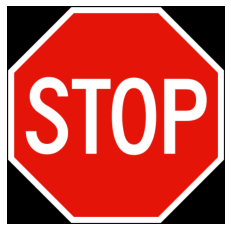

In [30]:
# load mask
stop_mask = load_mask("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Liberian_Road_Signs_-_Regulatory_Sign_-_Stop.svg/400px-Liberian_Road_Signs_-_Regulatory_Sign_-_Stop.svg.png")

# show mask
plt.imshow(stop_mask)
plt.axis("off")
plt.show()

Then we create and show default wordcloud. In particular, we can color the wordcloud using ImageColorGenerator's image-based coloring technique. It uses the average color of the region occupied by the word in a source image:

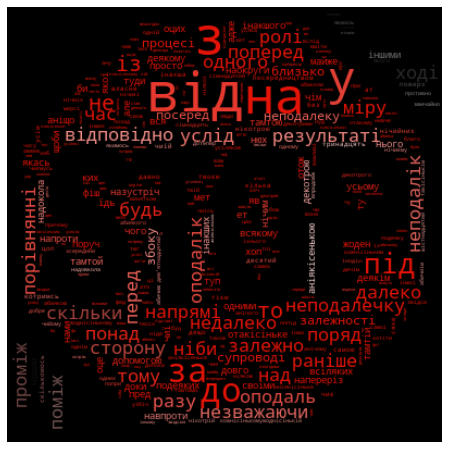

In [31]:
from wordcloud import WordCloud, ImageColorGenerator

# create wordcloud
wordcloud = WordCloud(
    background_color="black",
    mask=stop_mask,
    random_state=42,
    max_font_size=50,
    max_words=700,
)

wordcloud.generate(' '.join(STOP_WORDS))

image_colors = ImageColorGenerator(stop_mask)

# show wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 align="center">Stemming</h3>

For grammatical purposes, documents are going to use various forms of a word, such as `швидко`, `швидкий`, `швидкі`. In certain cases, it appears that it would be useful for a search for one of these words to return documents that contain another word in the set. Both stemming and lemmatization have the aim of reducing a word's inflectional and often derivationally related forms to a common base form.

**Stamming** is the process of shortening a word to the base by discarding auxiliary parts, such as endings or suffixes. The results of stemming are sometimes very similar to determining the root of a word, but its algorithms are based on other principles. Therefore, the word after processing by the algorithm of steming (stematization) may differ from the morphological root of the word.

*Example*: 

*`бігом`*, *`бігаю`*, *`бігати`* → **`біг`**

*`швидко`*, *`швидкий`*, *`швидкі`* → **`швидк`**

For good we would use `PorterStemmer` from `nltk.stem`, but for obvious reasons we can't. But this is not a problem, because writing your own `PorterStemmer` realization is not so difficult, so we can just import it. Our stemmer was developed for Python based on this PHP code: https://github.com/teamtnt/tntsearch/blob/master/src/Stemmer/UkrainianStemmer.php

In [32]:
from stemmer_ua import UAStemmer

def stem_words(words):
    return [UAStemmer(word).stem_word() for word in words]

stemmed_words = stem_words(filtered_words)
print(stemmed_words)

['дуж', 'приємн', 'базов', 'одяг', '.', 'я', 'дум', ',', 'розмір', '.', 'мен', 'подобаєт', 'змоз', 'знайт', 'відтінк', 'зелен', ',', 'виріш', ',', 'світл', 'відтінок', 'жіноч', 'колір', '.', 'це', 'єдин', 'бренд', ',', 'знайт', 'приглушен', 'зелен']


<h3 align="center">Lemmatizing</h3>

<cite><b>Lemmatization</b>, unlike <b>Stemming</b>, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called <b>Lemma</b>. A lemma is the canonical form, dictionary form, or citation form of a set of words.</cite>

At lematization the word loses inflectional endings and finds the basic form. For example, the noun `[плечима — плече]`, the verb `[ходили — ходити]`, the adjective `[смішним — смішний]`.

Python `NLTK` provides `WordNet Lemmatizer` that uses the `WordNet Database` to lookup lemmas of words. But there is no Ukrainian, after some searching I found that in `pymorphy2` there is support for Ukrainian, actually, at the experimental level (at the time of writing - March 2021), but there is.

To install the library, type in the terminal: `pip install pymorphy2` and  `pip install -U pymorphy2-dicts-uk`

Let's connect the library and see how it works:

In [33]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer(lang='uk')
morph.parse('відчувається')

[Parse(word='відчувається', tag=OpencorporaTag('VERB,Refl,impf sing,3per,pres'), normal_form='відчуватися', score=1.0, methods_stack=((DictionaryAnalyzer(), 'відчувається', 281, 12),))]

Now let's try the lematizer on our test review:

In [34]:
def lemmatize_words(morph, words):
    return [morph.parse(word)[0].normal_form for word in words]

lemmatized_words = lemmatize_words(morph, filtered_words)
print(lemmatized_words)

['дуже', 'приємний', 'базовий', 'одяг', '.', 'я', 'думати', ',', 'розмір', '.', 'мен', 'подобатися', 'змога', 'знайти', 'відтінок', 'зелений', ',', 'вирішити', ',', 'світлий', 'відтінок', 'жіночий', 'колір', '.', 'це', 'єдиний', 'бренд', ',', 'знайти', 'приглушений', 'зелень']


<h2 align="center">Processing of All Reviews</h2>

Now let's start processing all reviews using the methods described above. Lematization is quite a time-consuming procedure, so you have to wait:

In [35]:
# Use regex_tokenizer to get rid of punctuation
words_list = [regex_tokenizer(item) for item in list(reviews['review_text'])]
print("Review without punctuation: ", words_list[3])

# Eliminate stopwords
words_list = [stopwords_elimination(STOP_WORDS, word) for word in words_list]
print("\n\nReview after stopwords elimination: ", words_list[3])

# Lemmatizing
words_list = [lemmatize_words(morph, word) for word in words_list]
print("\n\nReview after lemmatizing: ", words_list[3])

Review without punctuation:  ['Дуже', 'приємний', 'базовий', 'одяг', 'Я', 'думаю', 'що', 'розмір', 'добре', 'Мені', 'дуже', 'подобається', 'бути', 'в', 'змозі', 'знайти', 'ці', 'відтінки', 'зеленого', 'хоча', 'я', 'вирішив', 'що', 'світлий', 'відтінок', 'дійсно', 'жіночий', 'колір', 'Це', 'єдиний', 'бренд', 'який', 'я', 'можу', 'знайти', 'ці', 'приглушені', 'зелені']


Review after stopwords elimination:  ['Дуже', 'приємний', 'базовий', 'одяг', 'Я', 'думаю', 'розмір', 'Мені', 'подобається', 'змозі', 'знайти', 'відтінки', 'зеленого', 'вирішив', 'світлий', 'відтінок', 'жіночий', 'колір', 'Це', 'єдиний', 'бренд', 'знайти', 'приглушені', 'зелені']


Review after lemmatizing:  ['дуже', 'приємний', 'базовий', 'одяг', 'я', 'думати', 'розмір', 'мен', 'подобатися', 'змога', 'знайти', 'відтінок', 'зелений', 'вирішити', 'світлий', 'відтінок', 'жіночий', 'колір', 'це', 'єдиний', 'бренд', 'знайти', 'приглушений', 'зелень']


<h3 align="center">Transition from multidimensional array to one-dimensional</h3>

In [36]:
from nltk import FreqDist

all_words = np.concatenate(words_list)

all_words_freq = FreqDist(all_words) # count the number of times that each outcome of an experiment occurs
    
print("Most popular words: ", all_words_freq.most_common(100))
print("\nTotal number of unique words: ", len(all_words_freq.keys()))

Most popular words:  [('я', 45788), ('це', 19713), ('мати', 16143), ('отримати', 10901), ('великий', 9758), ('використовувати', 9727), ('фільм', 9477), ('зробити', 8332), ('продукт', 8287), ('цей', 7957), ('повинний', 7790), ('працювати', 7751), ('купити', 7734), ('любити', 7705), ('робити', 7346), ('хотіти', 6724), ('хороший', 6409), ('думати', 5818), ('він', 5738), ('книга', 5658), ('якщо', 5489), ('проблема', 5421), ('2', 5079), ('чудовий', 4724), ('у', 4663), ('річ', 4550), ('мій', 4549), ('знайти', 4464), ('знати', 4445), ('новий', 4319), ('гра', 4310), ('the', 4287), ('вони', 4278), ('камера', 4120), ('журнал', 4079), ('але', 3896), ('не', 3896), ('частина', 3696), ('купувати', 3643), ('рекомендувати', 3610), ('легко', 3536), ('перший', 3520), ('ви', 3491), ('3', 3489), ('грати', 3429), ('5', 3423), ('і', 3261), ('якість', 3247), ('бачити', 3245), ('виглядати', 3234), ('отримувати', 3207), ('раз', 3206), ('1', 3182), ('робот', 3140), ('місяць', 3108), ('день', 3087), ('історія', 

<h3 align="center">Visualization of the most used words</h3>

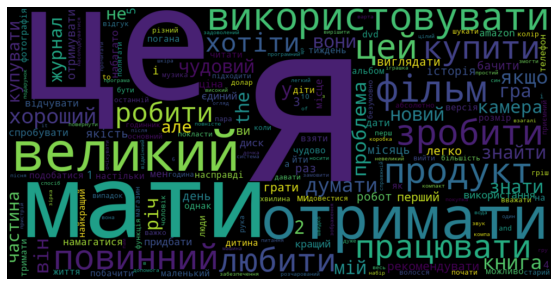

In [37]:
wordcloud = WordCloud(
    background_color="black",
    width=1000,
    height=500,
    random_state=42,
)

wordcloud.generate_from_frequencies(all_words_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:>

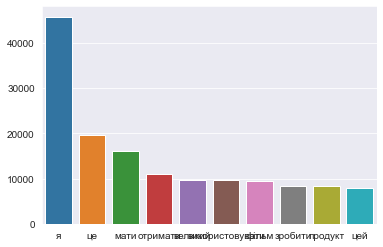

In [38]:
import seaborn as sns
count, words = [], []
for w in all_words_freq.most_common(10):
    words.append(w[0])
    count.append(w[1])

sns.set_style("darkgrid")
sns.barplot(x=words,y=count)

As we can see, we still have a lot of words that are not important in the context (`я`, `і`, `це`), in addition, there are a couple of English words, this needs to be corrected, so we are writing new methods.

<h3 align="center">Irrelevent Words Elimination</h3>

We will delete all words with Latin letters, words with a length of less than 3 and numbers. I don't know why, but for one cycle, it doesn't delete all superfluous words therefore it was necessary to put for this purpose a `while` cycle.

In [39]:
from re import match 

def irr_words_elim(words):
    while True:
        ready = True
        
        for word in words:
            if bool(match(r"[a-zA-Z]", word)) or word.isdigit() or len(word) <= 3:
                ready = False
                words.remove(word)
        
        if ready: break
        
    return words

Now actually delete all irrelevant words:

In [40]:
for review in words_list: 
    irr_words_elim(review)

all_words = np.concatenate(words_list)
all_words_freq = FreqDist(all_words)

print("\nTotal number of unique words:", len(all_words_freq))


Total number of unique words: 50408


<h3 align="center">Visualization of the most used words after processing</h3>

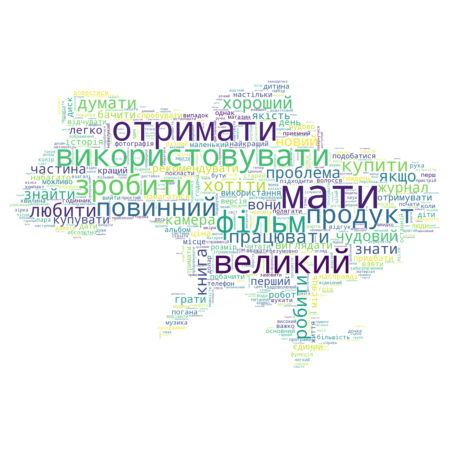

In [41]:
mask = load_mask("https://i.imgur.com/UVe6Nas.png")

wordcloud = WordCloud(
    background_color="white", 
    mask=mask,
    max_words=500,
    random_state=42,
)

wordcloud.generate_from_frequencies(all_words_freq)


plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

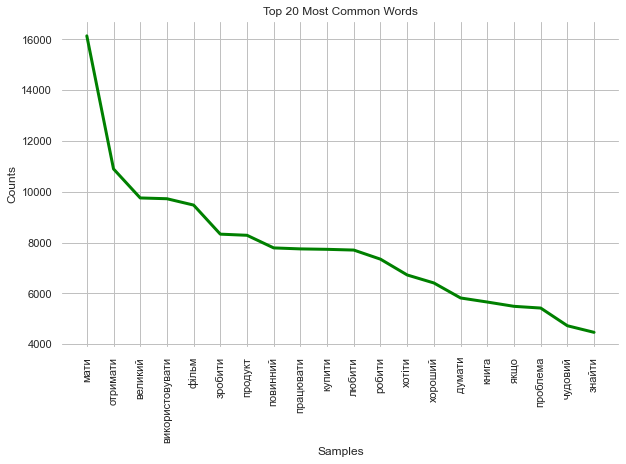

<AxesSubplot:title={'center':'Top 20 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [42]:
%matplotlib inline
sns.set()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('xkcd:white')

all_words_freq.plot(20, color="green", title="Top 20 Most Common Words", linewidth=3)

<h2 align="center">Data Preparation For Training</h2>

We will create our training documents in the form of a tuple. Why tuple? The tuple is immutable, ie they have a fixed size in nature, while the lists are dynamic, they can be changed. Now we don't need to add or remove items, so tuples are a great option, and tuples are faster than lists.

In [43]:
from random import shuffle

def create_doc(reviews, words_list):
    category = list(reviews['Class'])
    docs = [(words_list[word], category[word]) for word in range(len(words_list)) if words_list[word]]
    shuffle(docs)
    return docs

docs = create_doc(reviews, words_list)
print(docs[1], "\n\nNumber of documents:", len(docs))

(['любити', 'лялька', 'бачити', 'магазин', 'зробити', 'закохатися', 'зачекати', 'отримати', 'думати', 'дорого', 'коштувати', 'гроші'], 'pos') 

Number of documents: 38271


The number of lists has become smaller, because after deleting unnecessary words, some lists became empty.

In next part we also need to work with our data, which we have processed here, so let's `pickle` them.

`pickle`  - module, which implements a powerful algorithm for serializing and deserializing Python objects. "*Pickling*" is the process of converting a Python object to a stream of bytes, and "*unpickling*" is the reverse operation, which converts a stream of bytes back to a Python object. Since a stream of bytes can be easily written to a file, the pickle module is widely used to store and load complex objects in Python.

In [44]:
import pickle

with open("documents.pql", "wb") as ms:   # Pickling
    pickle.dump(docs, ms)

Now we will create a method **`find_matches`** that will return the dictionary with words as key and the presence in our dictionary of most common words (`all_words_freq`) as a value of `True` or `False`, an additional parameter will represent a number of most frequently repeated words we want to use (default - 50).

In [45]:
def find_matches(doc, all_words, num_freq=50):
    word_matches = [word[0] for word in all_words.most_common(num_freq)]
    words = regex_tokenizer(doc)

    matches = {}
    for word in word_matches:
        matches[word] = (word in words)

    return matches

**`create_matches_set`** creates for each of our documents, which we generated in the **`create_doc`** method, a map of occurrences of popular words in a sentence using the **`find_matches`** method:

In [46]:
def create_matches_set(docs, all_words, num_freq=100):
    matches = []
    for doc, state in docs:
        match = find_matches(' '.join(doc), all_words, num_freq)
        matches.append((match, state))
    return matches

In [47]:
matches_set = create_matches_set(docs[:10], all_words_freq)

print(matches_set[1])

({'мати': False, 'отримати': True, 'великий': False, 'використовувати': False, 'фільм': False, 'зробити': True, 'продукт': False, 'повинний': False, 'працювати': False, 'купити': False, 'любити': True, 'робити': False, 'хотіти': False, 'хороший': False, 'думати': True, 'книга': False, 'якщо': False, 'проблема': False, 'чудовий': False, 'знайти': False, 'знати': False, 'новий': False, 'вони': False, 'камера': False, 'журнал': False, 'частина': False, 'купувати': False, 'рекомендувати': False, 'легко': False, 'перший': False, 'грати': False, 'якість': False, 'бачити': True, 'виглядати': False, 'отримувати': False, 'робот': False, 'місяць': False, 'день': False, 'історія': False, 'використання': False, 'ціна': False, 'єдиний': False, 'набагато': False, 'кращий': False, 'придбати': False, 'диск': False, 'спробувати': False, 'місце': False, 'намагатися': False, 'дати': False, 'відчувати': False, 'насправді': False, 'люди': False, 'чудово': False, 'подобатися': False, 'побачити': False, 'мал

<h2 align="center">Test Training</h2>

We will now split the data set in order to perform unbiased model evaluation and identify underfitting or overfitting.

To do this, we will use `scikit-learn` or `sklearn` module. It has many packages for data science and machine learning, but for now we will focus on the `model_selection` package, in particular the `train_test_split()` function.

`train_test_split` - split arrays into random train and test subsets.

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(matches_set, random_state=42)
print(train_set[5])

({'мати': False, 'отримати': False, 'великий': True, 'використовувати': False, 'фільм': True, 'зробити': False, 'продукт': False, 'повинний': False, 'працювати': False, 'купити': False, 'любити': False, 'робити': True, 'хотіти': False, 'хороший': False, 'думати': False, 'книга': True, 'якщо': True, 'проблема': False, 'чудовий': False, 'знайти': False, 'знати': True, 'новий': False, 'вони': False, 'камера': False, 'журнал': False, 'частина': False, 'купувати': False, 'рекомендувати': False, 'легко': False, 'перший': False, 'грати': False, 'якість': False, 'бачити': False, 'виглядати': False, 'отримувати': False, 'робот': False, 'місяць': False, 'день': False, 'історія': False, 'використання': False, 'ціна': False, 'єдиний': False, 'набагато': False, 'кращий': False, 'придбати': False, 'диск': False, 'спробувати': False, 'місце': False, 'намагатися': False, 'дати': False, 'відчувати': False, 'насправді': False, 'люди': False, 'чудово': False, 'подобатися': False, 'побачити': False, 'мале

Now we will save our DataFrame and `matches_set` in csv fortmat, because it took too long to generate, we will use `pickle` for that.

In [49]:
with open("matches_set.pql", "wb") as ms:   # Pickling
    pickle.dump(matches_set, ms)

reviews.to_csv("reviews.csv", sep='\t', encoding='utf-8')

In [50]:
with open("matches_set.pql", "rb") as ms:   # Unpickling
    r = pickle.load(ms)
print(r[2])

({'мати': False, 'отримати': False, 'великий': True, 'використовувати': False, 'фільм': False, 'зробити': False, 'продукт': False, 'повинний': False, 'працювати': False, 'купити': False, 'любити': False, 'робити': False, 'хотіти': False, 'хороший': False, 'думати': False, 'книга': False, 'якщо': False, 'проблема': False, 'чудовий': False, 'знайти': False, 'знати': False, 'новий': False, 'вони': False, 'камера': False, 'журнал': False, 'частина': True, 'купувати': True, 'рекомендувати': False, 'легко': False, 'перший': False, 'грати': False, 'якість': False, 'бачити': False, 'виглядати': False, 'отримувати': False, 'робот': False, 'місяць': False, 'день': False, 'історія': False, 'використання': False, 'ціна': False, 'єдиний': False, 'набагато': False, 'кращий': False, 'придбати': False, 'диск': False, 'спробувати': False, 'місце': False, 'намагатися': False, 'дати': False, 'відчувати': False, 'насправді': False, 'люди': False, 'чудово': False, 'подобатися': False, 'побачити': False, 'м

<h2 align="center">Classifier Creation (Naive Bayes Classification)</h2>

Let's use a quick approach to Naive Bayesian classification to see if our pre-processing data can give us good results to continue further more complex models. To begin with, let's expand our `matches_set` to process all books (may take some time):

In [51]:
matches_set = create_matches_set(docs, all_words_freq, 2500)

Good, now train and test it:

In [52]:
train_set, test_set = train_test_split(matches_set, test_size=0.33, random_state=42)
print("Length of Matches Set:", len(matches_set), "\nLength of Train Set:", len(train_set))

Length of Matches Set: 38271 
Length of Train Set: 25641


Now we will finally use Naive Bayes Classification and see what accuracy in our model, and what are the most informative features in it:

In [53]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

def naive_bayes_model(train_set, test_set):
    classifier = NaiveBayesClassifier.train(train_set) 
    informative = classifier.show_most_informative_features(10)
    accuracy = nltk.classify.accuracy(classifier, test_set) * 100
    return classifier, informative, accuracy

In [54]:
classifier, informative, accuracy = naive_bayes_model(train_set, test_set)
print(informative)
print("\nClassifier Accuracy:", str(round(accuracy, 2)) + "%") # predict

Most Informative Features
                   марно = True              neg : pos    =     20.4 : 1.0
                   трата = True              neg : pos    =     14.7 : 1.0
                найгірше = True              neg : pos    =     14.1 : 1.0
               найгірший = True              neg : pos    =     12.4 : 1.0
           відшкодування = True              neg : pos    =     11.8 : 1.0
             непридатний = True              neg : pos    =     11.8 : 1.0
                   лайно = True              neg : pos    =     10.2 : 1.0
               розбитися = True              neg : pos    =      9.2 : 1.0
              комплімент = True              pos : neg    =      8.5 : 1.0
                    оман = True              neg : pos    =      8.3 : 1.0
None

Classifier Accuracy: 79.94%


We have 80-85% accuracy in our classifier, which is a good sign to move on!

<h2 align="center">Testing Classifier</h2>

To properly test our input sentence, it must go through all stages of processing - tokenize, lemmatize and stop_words, irrelevant_words elimination. Let's write a method:

In [55]:
def words_preparation(sent):
    words = regex_tokenizer(sent)                    # remove punctuation
    words = stopwords_elimination(STOP_WORDS, words) # eliminate stopwords
    words = lemmatize_words(morph, words)            # lemmatizing
    words = irr_words_elim(words)                    # irrelevent words elimination
    print("Sentence after processing:", words)
    return " ".join(words)

And test it:

In [56]:
test_sent = "Мене радує, що вже скоро я зможу різать русню."
print("Test sentence:", test_sent)

test_sent = find_matches(words_preparation(test_sent), all_words_freq, 2500)
classifier.classify(test_sent)

Test sentence: Мене радує, що вже скоро я зможу різать русню.
Sentence after processing: ['радувати', 'скоро', 'змогти', 'різати', 'руснити']


'pos'

The first test is passed, let's use less obvious words:

In [57]:
test_sent = "Ця книга є достатньо читабельною.."
print("Test sentence:", test_sent)

test_sent = find_matches(words_preparation(test_sent), all_words_freq, 2500)
classifier.classify(test_sent)

Test sentence: Ця книга є достатньо читабельною..
Sentence after processing: ['книга', 'достатньо', 'читабельний']


'pos'

And here everything is correct. Let's check the sentences with a negative mood:

In [58]:
test_sent = "Німецький уряд один з найгірших та найслабших в Європі, з їх 'допомогою' хочеться послати їх за російський кораблем!"
print("Test sentence:", test_sent)

test_sent = find_matches(words_preparation(test_sent), all_words_freq, 2500)
classifier.classify(test_sent)

Test sentence: Німецький уряд один з найгірших та найслабших в Європі, з їх 'допомогою' хочеться послати їх за російський кораблем!
Sentence after processing: ['німецький', 'уряд', 'найгірший', 'найслабший', 'європа', 'допомога', 'хотітися', 'послати', 'російський', 'корабель']


'neg'

Working! That's all here, next we will try to apply a different approach than this naive way, we will use LSTM, which takes into account the order of words in the sentence to get better accuracy.